In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [343]:
X=pd.read_csv(r'Datasets/Housing Regression/train.csv')

In [344]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [345]:
X.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [346]:
temp=pd.DataFrame(X[['GarageArea',"SalePrice"]],columns=["GarageArea","SalePrice"])

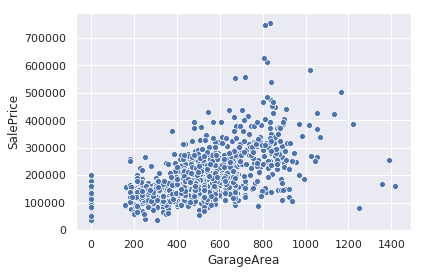

In [347]:
sns.scatterplot(x="GarageArea",y="SalePrice",data=temp)

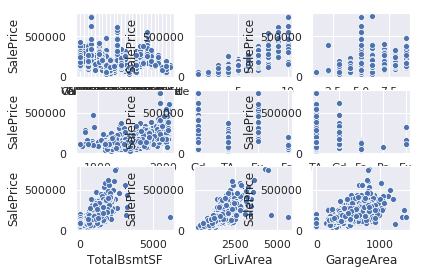

In [348]:
x=1
l=["Neighborhood","OverallQual","OverallCond","YearBuilt","ExterQual","ExterCond","TotalBsmtSF","GrLivArea","GarageArea"]
for i in l:
    plt.subplot(3,3,x)
    x+=1
    temp=pd.DataFrame(X[[i,"SalePrice"]],columns=[i,"SalePrice"])
    sns.scatterplot(x=i,y="SalePrice",data=temp)

### The major variables seem to affect are the OverallQual,YearBuilt,TotalBsmtSF,GrLivArea

In [349]:
X.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

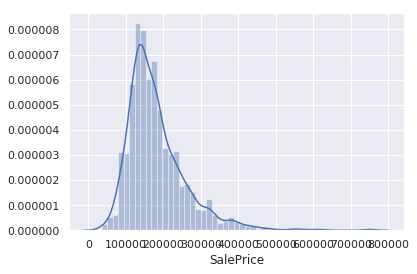

In [350]:
sns.distplot(X["SalePrice"])

In [351]:
print("Skewness ",X["SalePrice"].skew())
print("Kurtosis ",X["SalePrice"].kurt())

Skewness  1.8828757597682129
Kurtosis  6.536281860064529


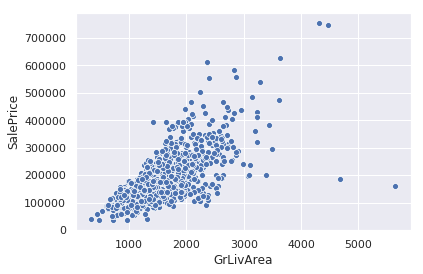

In [352]:
var="GrLivArea"
data = pd.concat([X[var],X["SalePrice"]],1)
sns.scatterplot(x=var,y='SalePrice',data=data)

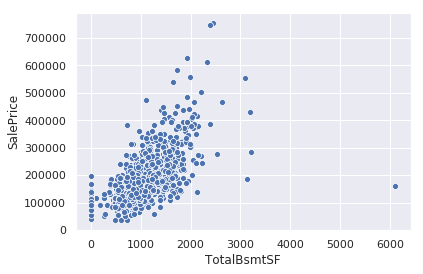

In [353]:
var="TotalBsmtSF"
data = pd.concat([X[var],X["SalePrice"]],1)
sns.scatterplot(x=var,y='SalePrice',data=data)

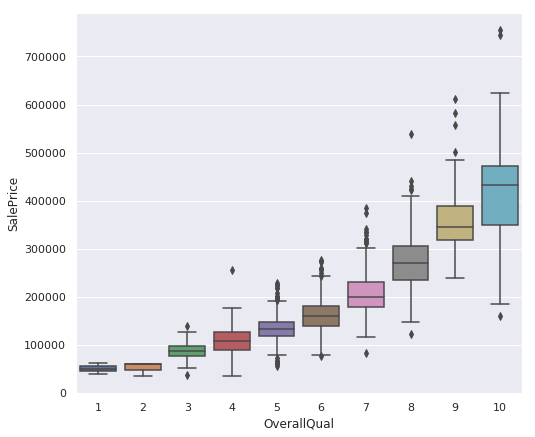

In [354]:
var="OverallQual"
data = pd.concat([X[var],X["SalePrice"]],1)
f, ax = plt.subplots(figsize=(8, 7))
sns.boxplot(x=var,y='SalePrice',data=data)

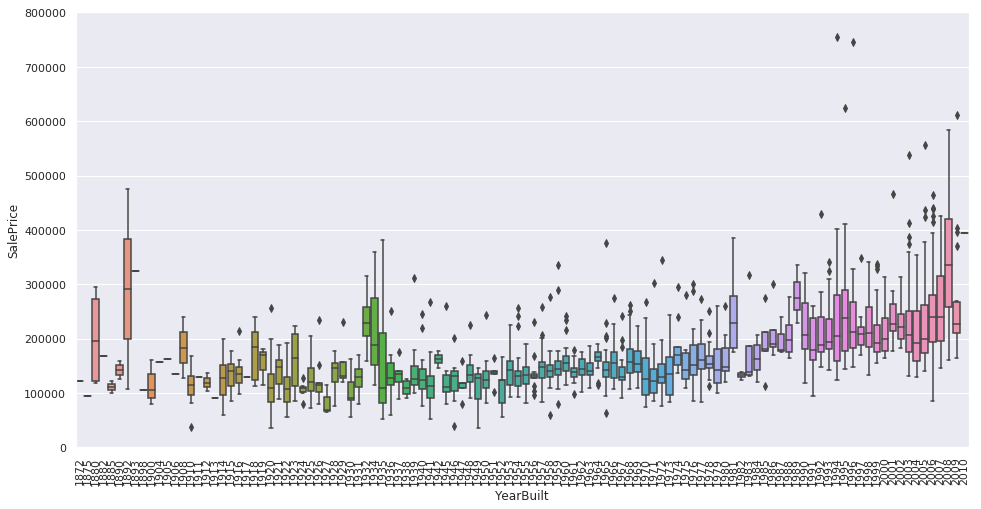

In [355]:
var = 'YearBuilt'
data = pd.concat([X['SalePrice'], X[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);


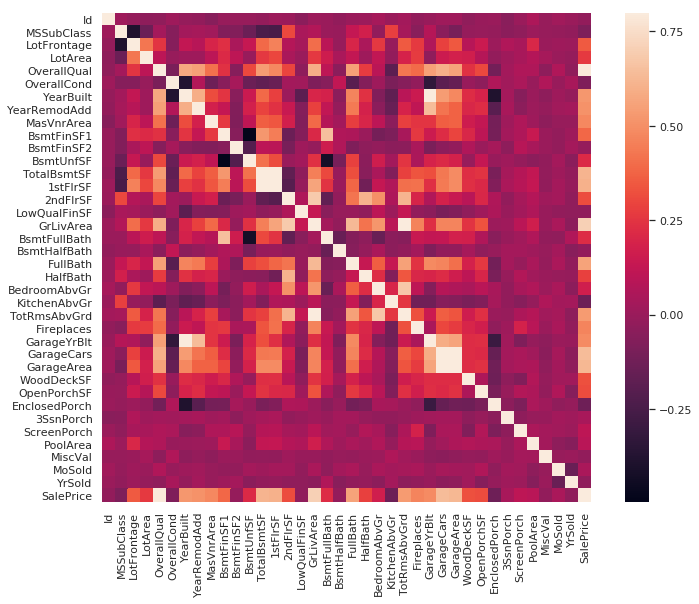

In [356]:
X_corr=X.corr()
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(data=X_corr, vmax=.8, square=True)

In [363]:
k = 10 #number of variables for heatmap
cols = X_corr.nlargest(k, 'SalePrice')["SalePrice"].index

In [364]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

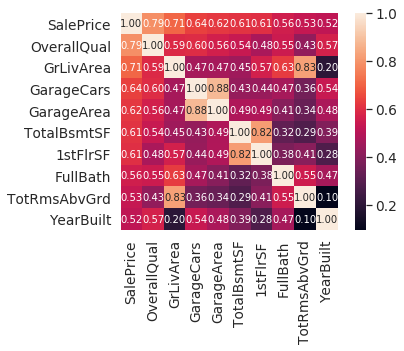

In [365]:
X_new_corr=X[cols].corr()
sns.set(font_scale=1.25)
hm = sns.heatmap(X_new_corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})


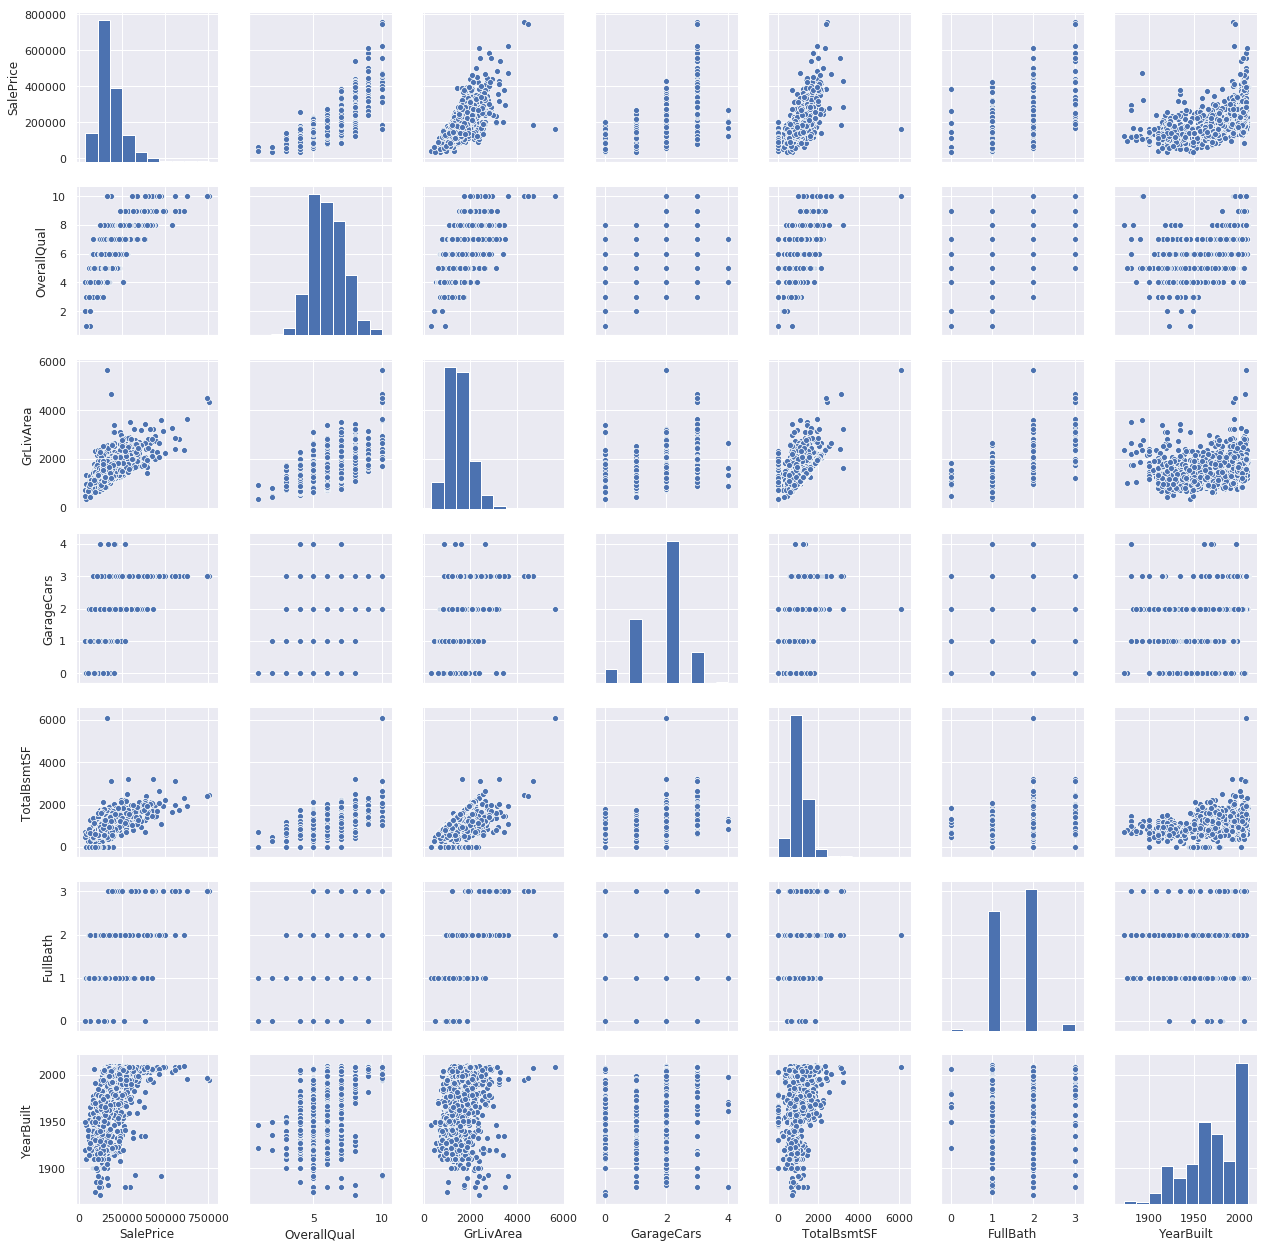

In [366]:
sns.set()
cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(X[cols])

In [367]:
total =  X.isnull().sum().sort_values(ascending=False)
percent = (X.isnull().sum()/X.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [403]:
cols=missing_data.loc[missing_data['Total'] > 600].index

In [404]:
Test=Test.drop(columns=cols,axis=1)

In [370]:
Test.shape

(1459, 75)

In [371]:
X_new=X.drop(columns=cols,axis=1)

In [372]:
X_new.shape


(1460, 76)

In [373]:
x=X_new.fillna(value=X_new.mode().iloc[0,:])

In [405]:
Test=Test.fillna(value=Test.mode().iloc[0,:])

In [375]:
x.shape

(1460, 76)

In [376]:
Test.shape

(1459, 75)

In [273]:
from sklearn.preprocessing import StandardScaler

In [274]:
saleprice_scaled = StandardScaler().fit_transform(x['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


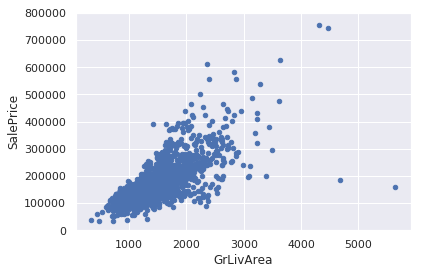

In [275]:
var = 'GrLivArea'
data = pd.concat([x['SalePrice'], x[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [276]:
x.sort_values(by = 'GrLivArea', ascending = False)[:2]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,...,0,0,0,0,0,10,2007,New,Partial,184750


In [377]:
x=x.drop(x[x['Id']==1299].index)
x=x.drop(x[x['Id']==524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


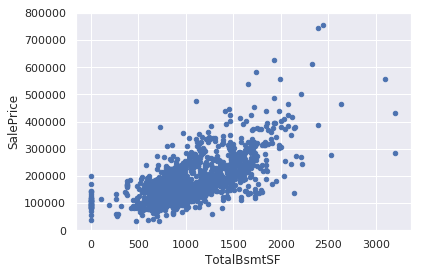

In [278]:
var = 'TotalBsmtSF'
data = pd.concat([x['SalePrice'], x[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


In [279]:
import statistics as stats
import scipy as sc

In [280]:
sns.distplot?


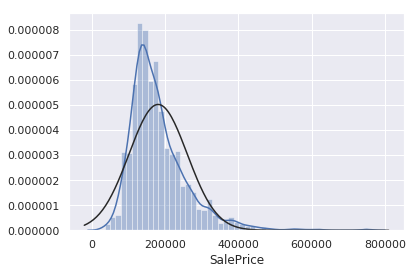

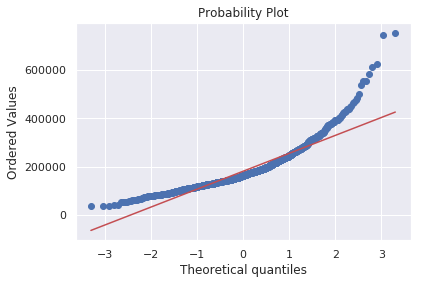

In [281]:
sns.distplot(x['SalePrice'],fit=sc.stats.norm);
fig = plt.figure()
res = sc.stats.probplot(x['SalePrice'], plot=plt)



In [378]:
x['SalePrice'] = np.log(x['SalePrice'])

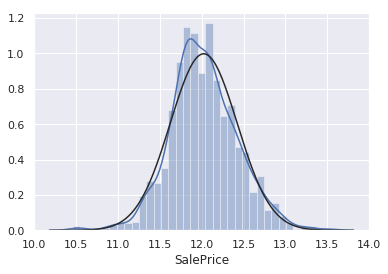

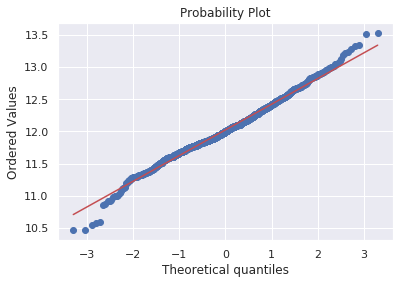

In [283]:
sns.distplot(x['SalePrice'], fit=sc.stats.norm);
fig = plt.figure()
res = sc.stats.probplot(x['SalePrice'], plot=plt)


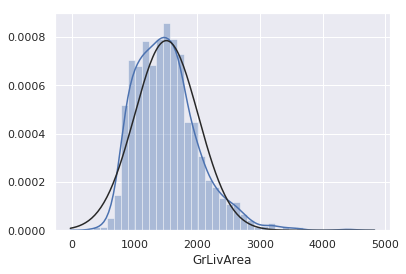

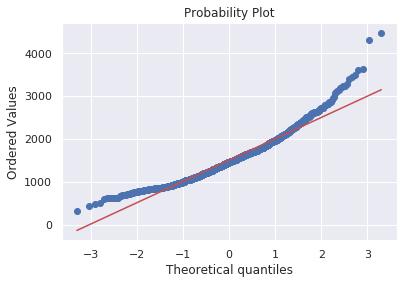

In [284]:
sns.distplot(x['GrLivArea'], fit=sc.stats.norm);
fig = plt.figure()
res = sc.stats.probplot(x['GrLivArea'], plot=plt)


In [379]:
x['GrLivArea'] = np.log(x['GrLivArea'])

In [406]:
Test['GrLivArea'] = np.log(Test['GrLivArea'])

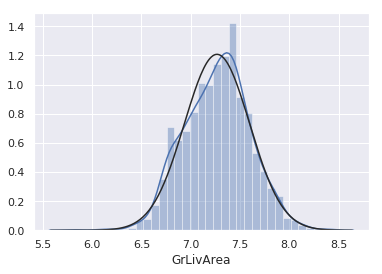

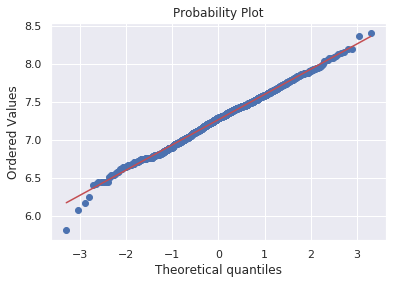

In [286]:
sns.distplot(x['GrLivArea'], fit=sc.stats.norm);
fig = plt.figure()
res = sc.stats.probplot(x['GrLivArea'], plot=plt)

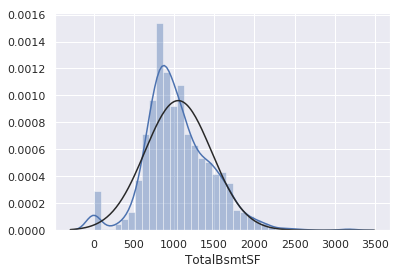

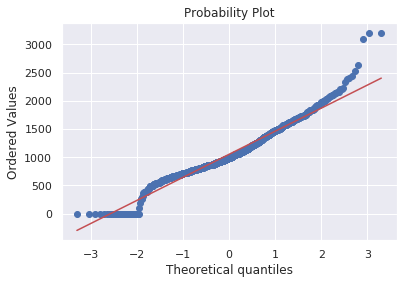

In [287]:
sns.distplot(x['TotalBsmtSF'], fit=sc.stats.norm);
fig = plt.figure()
res = sc.stats.probplot(x['TotalBsmtSF'], plot=plt)

In [381]:
x['HasBsmt'] = pd.Series(len(x['TotalBsmtSF']), index=x.index)
x['HasBsmt'] = 0 
x.loc[x['TotalBsmtSF']>0,'HasBsmt'] = 1

x.loc[x['HasBsmt']==1,'TotalBsmtSF'] = np.log(x['TotalBsmtSF'])

In [407]:
Test['HasBsmt'] = pd.Series(len(Test['TotalBsmtSF']), index=Test.index)
Test['HasBsmt'] = 0 
Test.loc[Test['TotalBsmtSF']>0,'HasBsmt'] = 1

Test.loc[Test['HasBsmt']==1,'TotalBsmtSF'] = np.log(Test['TotalBsmtSF'])

In [383]:
x.shape,Test.shape

((1458, 77), (1459, 76))

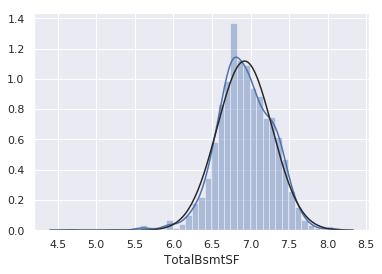

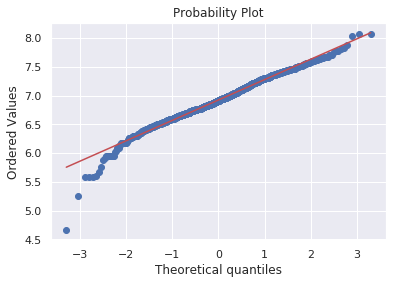

In [290]:
sns.distplot(x[x['TotalBsmtSF']>0]['TotalBsmtSF'], fit=sc.stats.norm);
fig = plt.figure()
res = sc.stats.probplot(x[x['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)



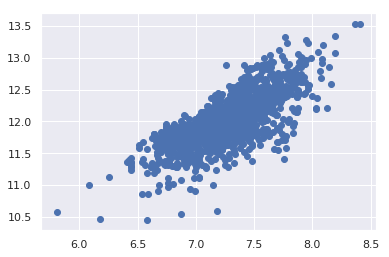

In [291]:
plt.scatter(x['GrLivArea'], x['SalePrice'])

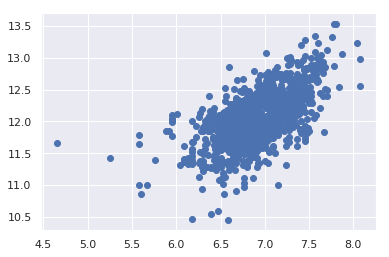

In [292]:
plt.scatter(x[x['TotalBsmtSF']>0]['TotalBsmtSF'], x[x['TotalBsmtSF']>0]['SalePrice']);

In [408]:
Y=x['SalePrice']
x_new=x.drop('SalePrice',1)

In [409]:
X_num=x_new.select_dtypes(include=["int64","float64"])

In [410]:
X_test_num=Test.select_dtypes(include=["int64","float64"])

In [411]:
X_obj=x_new.select_dtypes(include=['object'])

In [412]:
X_test_obj=Test.select_dtypes(include=['object'])

In [413]:
X_obj_enco=pd.get_dummies(X_obj)

In [414]:
X_test_obj_enco=pd.get_dummies(X_obj_enco)

In [415]:
X_now=X_num.join(X_obj_enco)

In [416]:
X_now2=X_test_num.join(X_test_obj_enco)

In [419]:
X_now.shape,X_now2.shape

((1458, 271), (1459, 271))

In [420]:
cols=X_now.columns

In [422]:
x_new=pd.DataFrame(StandardScaler().fit_transform(X_now),columns=cols)

In [423]:
x_test=pd.DataFrame(StandardScaler().fit_transform(X_now2),columns=cols)

In [315]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_new,Y)

In [316]:
import xgboost as xgb
xgr=xgb.XGBRegressor()

In [317]:
xgr.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [318]:
preds=xgr.predict(X_test)

In [319]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error( Y_test, preds ))


0.009508769507668267

In [401]:
Test=pd.read_csv(r'Datasets/Housing Regression/test.csv')

In [339]:
x_new.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=271)

In [338]:
x_test.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=256)

In [424]:
preds=xgr.predict(x_test)

In [429]:
fin=np.exp(preds)

In [430]:
col=["Id","SalePrice"]

X_print=pd.DataFrame(fin,columns=["SalePrice"])

X_print["Id"]=Test.Id

X_print=X_print[['Id',"SalePrice"]]

X_print.head()

X_print.to_csv('/home/ramanujam/MLWorks/a.csv',index=False)

X_print.shape

(1459, 2)